# Deep Learning

In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
print(tf.__version__)
keras.__version__

2.12.0


'2.12.0'

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [53]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [54]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [61]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [64]:
class_names[y_train[0]]

'Coat'

In [66]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# ***Erklärung der Schichten***
1. Flatten: nimmt die Eingabe und macht daraus ein 1D Array
2. Dense: 300 Neuronen, mit ReLU Aktivierungsfunktion
    Die erste Sicht hat bspweise 
    
                                28 x 28 = 784 

                                784 x 300 + 300 Bias-Terme = 235.500
                                
    was sich zu 235.500 Parameter ausfummiert. Jedoch Risiko overfitting.
3. Dense: 100 Neuronen, mit ReLU Aktivierungsfunktion
4. Dense: 10 Neuronen, mit Softmax Aktivierungsfunktion


### Liste mit den sichten eines Modells erhalten, um eine davon über ihren Index anzusprechen, oder Sie gehen über den Namen vor:

In [67]:
model.layers

In [70]:
hidden1 = model.layers[1]
hidden1.name

'dense_18'

In [71]:
model.get_layer(hidden1.name) is hidden1

True

In [73]:
weights, biases = hidden1.get_weights() # get_weights() and set_weights() are used to get and set the weights of a layer
print(biases)
biases.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(300,)

#### Es ist gut das alle biases auf 0 gesetzt sind. Da wir das so möchten um die Symeterie zu erhalten

## ***Das Model compilen und trainieren***

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


- sparse_categorical_crossentropy wird verwendet, weil wir spärliche Beschriftungen haben (d.h. für jede Instanz gibt es nur einen Zielklassenindex, in diesem Fall von 0 bis 9), und die Klassen sind exklusiv.
- Hätten wir stattdessen eine Zielwahrscheinlichkeit pro Klasse für jede Instanz (wie z.B. One-Hot-Vektoren, z.B. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], um Klasse 3 zu repräsentieren), dann müssten wir stattdessen den categorical_crossentropy loss verwenden.
- Wenn wir eine binäre Klassifizierung durchführen (mit einem oder mehreren binären Labels), dann würden wir in der Ausgabeschicht anstelle der Softmax-Aktivierungsfunktion die sigmoide (d.h. logistische) Aktivierungsfunktion verwenden und den binary_crossentropy loss einsetzen.
- Wenn wir regressieren würden, dann würden wir keine Aktivierungsfunktion in der Ausgabeschicht verwenden, und wir würden den Verlust mean_squared_error verwenden.
- Der Optimierer ist der Algorithmus, der zur Aktualisierung der Gewichte des Modells verwendet wird. Der gebräuchlichste Optimierer ist der Stochastische Gradientenabstieg (SGD), aber es gibt noch viele andere, und einige von ihnen sind viel schneller als SGD. Einige Optimierer sind auch in der Lage, die Lernrate während des Trainings automatisch zu verringern, so dass Sie sie nicht manuell einstellen müssen. Dies ist der Fall beim Adam-Optimierer, der sehr beliebt ist.
- Das Argument metrics wird verwendet, um die zu berechnenden Metriken anzugeben. In diesem Fall geht es nur um die Genauigkeit.



In [75]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7075 - accuracy: 0.7667 - val_loss: 0.5064 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4869 - accuracy: 0.8311 - val_loss: 0.4324 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4411 - accuracy: 0.8457 - val_loss: 0.4232 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4151 - accuracy: 0.8543 - val_loss: 0.4028 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3952 - accuracy: 0.8609 - val_loss: 0.3906 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8674 - val_loss: 0.3795 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3647 - accuracy: 0.8720 - val_loss: 0.3733 - val_accuracy:

In [80]:
history.params
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

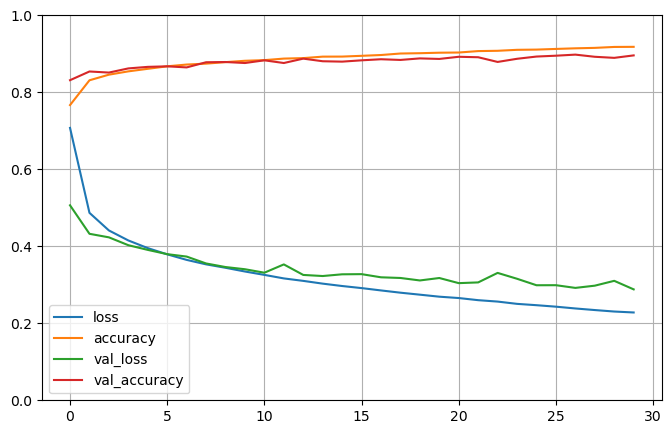

In [82]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertikale Bereich auf (0,1) setzten
plt.show()

In [83]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 729us/step - loss: 0.3231 - accuracy: 0.8840


[0.32310956716537476, 0.8840000033378601]

## Vorhersagen Treffen

In [84]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 59ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [88]:
# Assuming model is your trained Keras model
y_pred_probabilities = model.predict(X_new)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)
np.array(class_names)[y_pred_classes]

1/1 [==============================] - 0s 16ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [89]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# ***Das Gradientenverfahren***

- Allgemeiner Algoritmus zur Optimierung, der optimale Lösungen für eine Vielzahl von Fragestellungen ermitteln kann.
Der Grundgedanke beim Gradientenverfahren ist, die Parameter iterativ so zu verändern das eine Kostenfunktion minimiert wird.


# ***Grundlegende ideen bei einem Neural Network***


Ein Deep Neural Network (DNN) ist eine leistungsstarke Technik des maschinellen Lernens, die in verschiedenen Bereichen Anwendung findet. Die Bedeutung eines Deep Neural Networks liegt in seiner Fähigkeit, komplexe Muster in Daten zu erkennen und Vorhersagen oder Klassifikationen basierend auf diesen Mustern zu treffen.


 Hier sind einige der Schlüsselaspekte, die die Bedeutung von DNNs verdeutlichen:


- 1. Mustererkennung: DNNs sind in der Lage, Muster in großen und komplexen Datensätzen zu erkennen (die nicht Linear sind), die von Menschen schwer oder unmöglich zu identifizieren sind. Dies macht sie besonders wertvoll in Anwendungen wie Bilderkennung, Spracherkennung und Natural Language Processing (NLP).


- 2. Klassifikation und Vorhersage: DNNs ermöglichen die Klassifikation von Daten in verschiedene Kategorien oder die Vorhersage zukünftiger Ereignisse. Dies wird in Anwendungen wie Spam-Erkennung, Gesichtserkennung, medizinischer Diagnose und Finanzprognosen genutzt.


- 3. Skalierbarkeit: DNNs können große Mengen an Daten verarbeiten und sind in der Lage, Modelle mit Tausenden oder Millionen von Parametern zu trainieren. Dies ermöglicht die Bewältigung komplexer Aufgaben und die Verarbeitung großer Datensätze.


- 4. Automatisierung: DNNs können automatisch und kontinuierlich lernen, was bedeutet, dass sie sich an neue Daten und Veränderungen in der Umgebung anpassen können, ohne dass eine manuelle Anpassung erforderlich ist.


- 5. Vielseitigkeit: DNNs finden in verschiedenen Bereichen Anwendung, darunter Bildverarbeitung, Sprachverarbeitung, autonome Fahrzeuge, medizinische Diagnostik, Empfehlungssysteme und vieles mehr. Sie sind eine Kernkomponente von Künstlicher Intelligenz (KI) und Deep Learning.


- 6. Forschung und Innovation: DNNs haben zu bedeutenden Fortschritten in der KI-Forschung geführt und neue Möglichkeiten für innovative Anwendungen eröffnet. Sie sind ein Motor für die Entwicklung neuer Technologien und Lösungen.


Die Bedeutung eines Deep Neural Networks liegt in seiner Fähigkeit, komplexe Aufgaben zu bewältigen und menschenähnliche Leistungen bei der Verarbeitung von Informationen zu erzielen. Dies hat Auswirkungen auf viele Branchen und trägt zur Transformation von Geschäftsmodellen und zur Lösung komplexer Herausforderungen bei.

--

## ***Blackbox***: 

- Als Blockbox wir in Data Science die Hiddenlayers gemeint die der Programmier nicht sehen. Da nicht nachvollziebar ist wie das Model den Output generiert. Das Auch Deepl Learning Neurale Netzwerke Hidden Layers nutzen und die für den Programmierer auch eine Blackbox ist (siehe bild)

![Hidden Layer](/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/hiddenlayer.png)


### ***Arten von rekurrenten neuronalen Netzwerken (RNNs)***

Eine Eingabesequenz ist einer Ausgabe zugeordnet. Sie können sie jedoch flexibel an verschiedene Konfigurationen für bestimmte Zwecke anpassen. Im Folgenden sind einige gänige RNN-Typen aufgeführt.

#### **Eins-zu-viele**
- Dieser RNN-Typ kanalisiert einen Eingang an mehrere Ausgänge. Es ermöglicht sprachliche Anwendungen wie Bildunterschirften, indem ein Satz aus einem einzigen Schüsselwort generiert wird.

#### **Viel-zu-viele**
- Das Modell verwendet mehrere Eingaben, um mehrere Ausgaben vorherzusagen. Sie können beispielsweise einen Sprachübersetzter mit einem RNN erstellen, der einen Satz analysiert und die Wörter in einer anderen Sprache korrekt strukturiert.

#### **Viel-zu-eins**
- Mehrere Eingänge werden einem Ausgang zugeordet. Dies ist hilfreich bei Anwendungen wie der Stimmungsanalyse, bei der das Modell positive, negative und neutrale Stimmungen der Kunden anhand von Kundenreferenzen vorhersagt.


<img src="/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/rnn_models.jpeg" width="500" />



### **Rekurrentes neuronales Netzwerk im Vergleich zu neuronalem Feed-Forward-Netzwerk**

- Wie Rnns sind neuronale Feed-Forward-Netze künstliche neuronale Netze, die Informationen von einem Ende zum Ende der Architektur weiterleiten. 
Ein neuronales Feed-Forward-Netzwerk kann einfache Klassifizierungens-, Regressions- oder Erkennungsaufgaben ausführen, aber es kann sich nicht an die vorherige Eingabe erinnern, die es verarbeitet hat.

- Zumbeispiel vergisst es "Apfel", wenn sein Neuron das Wort *ist* verarbeitet.
Das RNN überwindet diese Speicherbeschränkung, indem es einen verborgenen Gedächtniszustand in das Neuron einbezieht.

# ***Backpropagation***


Was macht Backpropagation ?
- Bei jedem Trainingsdatenpunkt trifft der Backpropagation-Algorithmus zuerst eine Vohersage (im Vorwärtsdurchlauf), bestimmt den Fehler, durchläuft dann rückwärst jede Sicht, um den Fehlerbeitrag jeder Verbindung zuermitteln (im Rückwärtsdurchlauf), und verändert schließlich die Gewichte der Verbindungen, um den Fehler zu verringern (als Schritt im Gradientenverfahren)
    - Es ist wichtig, alle Verbindungsgewichte der verborgenen Sichten mit Zufallswerte zu initialisieren, denn sonst wird das Training fehlschlagen. Initialisieren Sie zum Beispiel alle Gewichte und Bias mit null, werden alle Neuronen in einer Schicht identisch sein, und die Backpropagation wird sie exakt gleich behandeln, womit sie identisch bleiben.      


# ***Weights and Bias***
- In einem einfachen neuronalen Netzwerk wird die Berechnung ähnlich wie bei einer linearen Regression durchgeführt, bei der eine Ausgabe 
**y** anhand einer linearen Kombination der Eingaben **x**, eines Intercepts (Gewichts) und eines Slopes (Bias) berechnet wird. Der wesentliche Unterschied besteht darin, dass ein neuronales Netzwerk aus mehreren Schichten von Neuronen besteht, die miteinander verbunden sind und nichtlinear miteinander interagieren. Diese **nichtlineare Interaktion** wird durch die Verwendung einer **Aktivierungsfunktion** in jedem Neuron ermöglicht. Dadurch ist das neuronale Netzwerk in der Lage, **komplexere Beziehungen** zwischen den Eingaben und der Ausgabe zu erfassen und zu modellieren.


<img src="/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/Terminologie_weights.png" width="400" />

<img src="/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/Terminologie_baises.png" width="400" />


--

**Activation Function apply a nonlinear transformation and decide whether a neuron should be activated or not**


- Ohne eine Aktivierungsfunktion ist es eine stacked Lineare Funktion zulösen. *Die Aktiverungsfunktion unbetten die funktion des Rnns*
- wenn wir jedoch ein nicht Lineares Problem haben, brauchen wir eine nicht Lineare aktiverungs funktion

Es gibt viele aktivierungsfunktionen für ein Neurales Network
- Step Function
- TanH
- Leaky ReLU
- Softmax
- ReLU (Rectified Linear Unit)
- Softplus
- Sigmoid 
- Die Funktion **ReLU** ist eine Aktivierungs-funktion, die in neuronalen Netzten verwendet wird. Sie steht für **(Rectified Linear Unit)**. 
Diese Funktion gibt einfach den Eingabewert zurück, **wenn er positiv ist, und gibt 0 zurück, wenn er negativ ist**. Es ist eine weit verbreitete Aktivierungsfunktion aufgrund ihrer Einfachheit und ihrer guten Leistung in vielen Anwendungen.

![Arten von Aktiverierungsfunktion](/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/aktivierungsfunktionen.jpeg)

Formel :


![Beschreibung des Bildes](/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/eq_29.png)



- y(t) = Steht für die Ausgabe des neuronalen Netzes zur Zeit (t). 
Es repräsentiert das, was das Netzwerk zu einem bestimmten Zeitpunkt vorhersagt oder generiert.


- **Wx** und **Wy** sind Gewichtsmatrizen, die die Verbindungen zwischen den Eigaben **Xt** und den vorherigen Ausgaben **yt−1** und den versteckten Schichten des neuronalen Netzes steuern. WXT und WTY bezeichne die Transponierten dieser Gewichtsmatrizen.

- **Xt** ist die Eingabe des neuronales Netzes zum Zeitpunkt **t**. Sie repräsentiert die Daten oder Informationen, die dem Netzwerk zu diesem Zeitpunkt präsentiert werden.

- **yt-1** ist die Ausgabe des neuronalen Netzes zum vorherigen Zeitpunkt t - 1. Sie wird verwendet, um die Informationen aus vergangenen Zustände zu berücksichtigen.

- **b** ist der Bias-Vektor für die versteckten Schichten des neuronalen Netzes, ER ermöglicht es dem Netzwerk, Verschiebungen in den Daten zu berücksichtigen.

Insgesamt wird die Ausgabe des neuronalen Netzes zum Zeitpunkt **t**
als gewichtete Summe der Eingaben **Xt** und der vorherigen Ausgabe **yt-1** berechnet, die dann durch **die ReLU-Aktivierungsfunktion** gehen. Dieser Prozess wird verwendet, um Vorhersagen zu machen oder Daten zu generieren, basierend auf den Informationen zu diesem Zeitpunkt und vergangenen Zuständen des Netzwerks.

# Kapitel 15

## 1. Verarbeiten von Sequenzen mit Rnns und Cnns

- RNN = Rekurrente neuronale Netze
CNN = 

Folgendes wird im Kaptiel Thematisert
1. Grundlegende Konzepte auf den RNN aufbaut und werden erfahren wie man sie per Backpropagation durch die Zeit trainiert
2. Schwierigkeiten der Modelle Thematisieren
    - Instablie Gradienten die durch verschiedene Techniken abgemildert werden können - unter anderem Recurrent Dropout und Recurrent Layer Normalization
    - Ein sehr begrenztes Kurzeitgedächtnis das mithilfe von LSTM und GRU-Zellen erweiter werden kann

Rnn sind nicht die einzigen Neuronal Netz die sequenzielle Daten verarbeiten können

In [1]:
import numpy as np
import keras
import pandas as pd

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2,offsets1, offsets2 = np.random.rand(4,batch_size, 1)
    time = np.linspace(0,1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # Welle 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))   # Welle 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)     # + Rauschen
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50

series = generate_time_series(10000, n_steps + 1)
series.shape

(10000, 51, 1)

In [4]:
# Erstellungs eines Traininigs einen Validierungs und einen Testdatensattz
n_steps = 50

series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000: -1]


In [5]:
print("Wir haben also 10000 Reihen mit 50 Spalten", series.shape)

Wir haben also 10000 Reihen mit 50 Spalten (10000, 51, 1)


In [6]:
print("Der X Test Datensatz besthet aus: ", X_train.shape, "Der Y Test Datensatz besthet aus: ", y_train.shape)
print("Der X Validierungs Datensatz besthet aus: ", X_valid.shape,"Der Validierungs Datensatz besthet aus: ", y_valid.shape)
print("Der X_test Datensatz besthet aus: ", X_test.shape,"Der y_test Datensatz besteht  aus: ", y_test.shape)


Der X Test Datensatz besthet aus:  (7000, 50, 1) Der Y Test Datensatz besthet aus:  (7000, 1)
Der X Validierungs Datensatz besthet aus:  (2000, 50, 1) Der Validierungs Datensatz besthet aus:  (2000, 1)
Der X_test Datensatz besthet aus:  (1000, 50, 1) Der y_test Datensatz besteht  aus:  (999, 51, 1)


In [7]:
print("**Daten typ**", type(X_train), type(y_train), type(X_valid), type(y_valid), type(X_test), type(y_test))
# alle sind numpy arrays und haben die gleiche Anzahl an Dimensionen
print("Shape der Daten",X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

**Daten typ** <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shape der Daten (7000, 50, 1) (7000, 1) (2000, 50, 1) (2000, 1) (1000, 50, 1) (999, 51, 1)


In [8]:
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020177832

# ***Mean squared Error MSE***
Der mittlere quadratische Fehler (MSE) ist eine gängige Metrik zur Bewertung der Leistung von Regressionsmodellen. Sie misst die durchschnittliche quadratische Abweichung zwischen den tatsächlichen und den vorhergesagten Werten.

Hier ist eine schrittweise Erklärung des MSE:
1. Differenz zwischen tatsächlichem und vorhergesagtem Wert: Für jede Instanz in den Daten wird die Differenz zwischen dem tatsächlichen Wert 
​und dem vorhergesagten Wert berechnet.

2. Quadrat der Differenz: Die Differenzen werden quadriert. Dies stellt sicher, dass negative und positive Abweichungen gleich behandelt werden und dass größere Abweichungen stärker ins Gewicht fallen.

3. Durchschnitt der quadrierten Differenzen: Die quadrierten Differenzen werden dann gemittelt, um den MSE zu erhalten. Dies geschieht, indem man die Summe der quadrierten Differenzen durch die Anzahl der Instanzen teilt.

**Mathematisch ausgedrückt:**


<img src="/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/Models/pictures_expl/mse.png" width="400" />



wo: 
n die anzahl 
yi der tatsächliche Wert den i-ten Instanz ist
y^i der vorherergesagte Wert der i-ten Instanz ist.


**WICHTIG:**
- Ein niedriger MSE-Wert deutet drauf hin, dass das Modell gute Vorhersagen macht, da die tatsächlichen und vorhergesagten Werte eng beieinander liegen. 

- Ein hoher MSE-Wert deutet hingegen darauf hin, dass das Model schlechte Vorhersagen macht, da die Abweichung zwischen den tatäschlich und den vorhergesagten Werten groß ist.


1. Flatten-Schicht: ist also wenn ich mir das Modul vorstellen das Input des Models
Vorschläge anzeigen

Die Flatten-Schicht kann als "Eingangstrichter" des Modells betrachtet werden. Sie nimmt die Eingabedaten entgegen und formatiert sie so, dass sie von den folgenden Schichten des Modells verarbeitet werden können.

**Details:**

Die Flatten-Schicht nimmt Daten mit einer beliebigen Form entgegen und "ebnet" sie in einen eindimensionalen Vektor.
Dies ist notwendig, da die meisten anderen Schichten des Modells mit Daten in Form von Vektoren arbeiten.
Die Größe des Vektors hängt von der Anzahl der Merkmale in den Eingabedaten ab.
Beispiel:

Angenommen, Sie haben Eingabedaten mit der Form (50, 10). Dies bedeutet, dass Sie 50 Datensätze mit jeweils 10 Merkmalen haben.

Die Flatten-Schicht würde diese Daten in einen Vektor mit 500 Elementen umwandeln.
Jedes Element des Vektors würde einem Merkmal aus einem der 50 Datensätze entsprechen.
Vorsichtsmaßnahmen:

Die Flatten-Schicht kann nur für Daten verwendet werden, die bereits in Form eines Arrays vorliegen.
Wenn Ihre Daten in einem anderen Format vorliegen, müssen Sie sie vor der Verwendung der Flatten-Schicht in ein Array konvertieren.

**Erklärung des Code abschnitt:**

- **keras.Models.Sequential** leitet ein model ein
- **keras.layer.Flatten** ist das Input, wenn man sich das Model vorsellt.
- **keras.layer.Dense** ist das Output des Models. 

    - In unseren konrekten code ist noch keine Hidden layer eingebaut
Somit können wir sehen das wir nur ein Input sowie Output haben des RNN Models. Jedoch noch keine Hiddenlayer

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1], name = "Input"),
    keras.layers.Dense(1, name = "Output")
])


 In diesem Fall wird **mean_squared_error** verwendet, was den mittleren quadratischen Fehler berechnet. Diese Funktion eignet sich gut für Regressionsaufgaben, bei denen kontinuierliche Werte vorhergesagt werden sollen.

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
  1/219 [..............................] - ETA: 29s - loss: 0.3415

2024-03-05 13:44:20.131765: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


219/219 [==============================] - 0s 319us/step - loss: 0.0563
Epoch 2/20
219/219 [==============================] - 0s 287us/step - loss: 0.0138
Epoch 3/20
219/219 [==============================] - 0s 280us/step - loss: 0.0109
Epoch 4/20
219/219 [==============================] - 0s 283us/step - loss: 0.0095
Epoch 5/20
219/219 [==============================] - 0s 281us/step - loss: 0.0083
Epoch 6/20
219/219 [==============================] - 0s 285us/step - loss: 0.0073
Epoch 7/20
219/219 [==============================] - 0s 277us/step - loss: 0.0065
Epoch 8/20
219/219 [==============================] - 0s 276us/step - loss: 0.0059
Epoch 9/20
219/219 [==============================] - 0s 280us/step - loss: 0.0054
Epoch 10/20
219/219 [==============================] - 0s 279us/step - loss: 0.0051
Epoch 11/20
219/219 [==============================] - 0s 279us/step - loss: 0.0048
Epoch 12/20
219/219 [==============================] - 0s 277us/step - loss: 0.0045
Epoch 13/20


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 50)                0         
                                                                 
 Output (Dense)              (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


Loss: ist ein Maß dafür wie gut oder schlecht Ihr Modell während des Trainings abschneidet. 

**model.compile(loss='mean_squared_error', optimizer='adam')** auch (MSE) genannt.
In meinem Fall habe ich als *loss funktion* den **'mean_squared_error'** eingesetzt.

- Höhe des Verlustes: Ein niedriger Verlustwert bedeutet, dass Ihr Modell gute Vorhersagen macht und die tatsächlichen Werte gut reproduziert. Ein hoher Verlustwert deutet darauf hin, dass Ihr Modell schlechte Vorhersagen macht und die tatsächlichen Werte nicht gut reproduziert.

- Veränderung des Verlustes über die Epochen: Wenn der Verlust im Laufe des Trainings abnimmt, deutet dies darauf hin, dass Ihr Modell besser wird und die Vorhersagen genauer werden. Wenn der Verlust jedoch stagniert oder steigt, kann dies darauf hinweisen, dass Ihr Modell nicht mehr lernt oder überangepasst ist.

## Ein einfaches RNN implementieren
### SimpleRnn

In [13]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None, 1])
])

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train,  epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.8869 - accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.6785 - accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4534 - accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2366 - accuracy: 0.0000e+00
Epoch 8/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2036 - accuracy: 0.0000e+00
Epoch 9/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1712 - accuracy: 0.0000e+00
Epoch 10/20
219/219 [==============================] - 1s 2ms/st

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### Deep Rnns
hier ist es ein Deep Rnn da wir ein hidden layers nutzen. Jedoch erstmal eine Linear Funktion da wir noch keine Aktivierungsfunktion haben.

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(X_train, y_train,  epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0151
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0039
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0036
Epoch 4/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0033
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0032
Epoch 6/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0032
Epoch 7/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0031
Epoch 8/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0030
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0030
Epoch 10/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0030
Epoch 11/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0029
Epoch 12/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0029
Epoch 13/20
219/219 [====

In [20]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [21]:
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [22]:
model.fit(X_train, y_train,  epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.0302
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0043
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 11/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 13/20
219/219 [====

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [24]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:] # X_new ist die Zeitreihe bis 50 und Y_new ist die Zeitreihe ab 50
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]
# Berechnung des MSE


1/1 [==============================] - 0s 13ms/step


In [25]:
np.mean(keras.losses.mean_squared_error(Y_new, Y_pred))

0.017976176

### Seite 513

In [26]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]  # 10 Schritte in die Zukunft
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [27]:
series.shape, X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape

((10000, 60, 1),
 (7000, 50, 1),
 (7000, 10),
 (2000, 50, 1),
 (2000, 10),
 (1000, 50, 1),
 (1000, 10))

In [28]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [29]:
Y_pred = model.predict(X_new)

1/1 [==============================] - 0s 131ms/step


In [30]:
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [31]:
model.fit(X_train, y_train,  epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.1545
Epoch 2/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1449
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1444
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1442
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1444
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.1442
Epoch 7/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1442
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1442
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1441
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1442
Epoch 11/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1441
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1441
Epoch 13/20
219/219 [====

In [32]:
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(Y_valid, Y_pred))

0.39600024

# Seite 514

In [33]:
Y = np.empty((10000, n_steps, 10)) # jedes Ziel ist eine Sequenz von 10-D-Vektoren
for step_ahead in range(1, 10 + 1):
    Y[:,:, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]  
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]


In [35]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss = 'mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train,  epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.0686
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0413
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0370
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0345
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0328
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0317
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0311
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0306
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0301
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0298
Epoch 11/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0294
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0290
Epoch 13/20
219/219 [====

Die TimeDistributed-Schicht ermöglicht es, eine Schicht (wie z.B. eine Dichteschicht) auf jeden Zeitschritt dieser Sequenz anzuwenden. Das bedeutet, dass die Schicht auf jeden einzelnen Datenpunkt in der Sequenz angewendet wird, anstatt die gesamte Sequenz als Ganzes zu betrachten.

In Ihrem Code wird die TimeDistributed-Schicht verwendet, um eine Dichteschicht (Dense-Schicht) auf jeden Zeitschritt der Ausgabe einer vorherigen SimpleRNN-Schicht anzuwenden. Dies erlaubt dem Modell, auf jede Zeitstufe der Ausgabe der vorherigen Schicht individuell zu reagieren und Muster in den Daten zu erkennen.

Insgesamt ermöglicht die Verwendung der TimeDistributed-Schicht eine feinere Steuerung und Anpassung des Modells an die Daten, insbesondere in Sequenzdatensätzen wie Zeitreihen oder Textdaten.

In [39]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20


/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


219/219 [==============================] - 2s 6ms/step - loss: 0.0490 - last_time_step_mse: 0.0373
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0354 - last_time_step_mse: 0.0232
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0320 - last_time_step_mse: 0.0201
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0291 - last_time_step_mse: 0.0171
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0271 - last_time_step_mse: 0.0149
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0256 - last_time_step_mse: 0.0130
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0234 - last_time_step_mse: 0.0104
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0221 - last_time_step_mse: 0.0092
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0215 - last_time_step_mse: 0.0090
Epoch 10/20
219/219 [

In [ ]:
Was sind Gradienten